#Spotify Data Project
Scott Hurwitz
hurwitzscott@gmail.com

#Goals

showcase the collection of data for 'intangible' metrics such as 'danceability', 'energy', etc.

uncover secondary or creative relationships

showcase process for controlling confounding variables

#Import Spotify Data
read .csv containing spotify data consisting of songs 
  and corresponding: 
  
  quantitative metrics such as: acousticness, liveness, 
  popularity, etc. scaled using various means that output relative values 
  between 0 and 1 
  
  qualitative metrics such as genre

  size: 175k song entries across multiple parameters

In [ ]:
import sqlite3 as sql
conn = sql.connect('example.db')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_rows', None)
c=conn.cursor()

In [ ]:
#data set by year
url = 'https://raw.githubusercontent.com/scotthurwitz1/csv/master/data.csv'
df = pd.read_csv(url)
print(len(df))

174389


In [ ]:
#imports data set sorted by genre
url1 = 'https://raw.githubusercontent.com/scotthurwitz1/csv/master/data_w_genres.csv'
df1 = pd.read_csv(url1)
df1['parent genre'] = [0]*len(df1)
print(len(df1))

32539


#Re-sort by Genre

in: dataframe with unique genres (ex. genre: english wind quartet)

out: same df with entries assigned to broad genres (ex. classical)
for use examining statistical characteristics of genres

note: entries were left unsorted due to there being an almost 1:1
song to unique genre ratio (high specificity data ---> low sorting efficiency)

In [ ]:
#loops through the df with genre data searching for keywords to attribute the
#songs to a "parent genre"
for i in range(len(df1['genres'])):
  a = df1['genres'][i]
  if 'rock' in a or 'punk' in a or 'alternative'in a or 'indie' in a or 'metal' in a or 'core' in a:
    df1['parent genre'][i] = 'rock'

for i in range(len(df1['genres'])):
  a = df1['genres'][i]
  if 'classical' in a or 'viol' in a:
    df1['parent genre'][i] = 'classical'

for i in range(len(df1['genres'])):
  a = df1['genres'][i]
  if 'hip' in a or 'rap' in a:
    df1['parent genre'][i] = 'hip hop/rap'

for i in range(len(df1['genres'])):
  a = df1['genres'][i]
  if 'house' in a or 'deep' in a:
    df1['parent genre'][i] = 'house'

for i in range(len(df1['genres'])):
  a = df1['genres'][i]
  if 'electro' in a or 'techno' in a or 'trance' in a or 'edm' in a:
    df1['parent genre'][i] = 'electro'

for i in range(len(df1['genres'])):
  a = df1['genres'][i]
  if 'latin' in a or 'musica' in a or 'cumbia' in a or 'salsa' in a or 'samba' in a:
    df1['parent genre'][i] = 'latin'

for i in range(len(df1['genres'])):
  a = df1['genres'][i]
  if 'pop' in a:
    df1['parent genre'][i] = 'pop'

for i in range(len(df1['genres'])):
  a = df1['genres'][i]
  if 'folk' in a:
    df1['parent genre'][i] = 'folk'

for i in range(len(df1['genres'])):
  a = df1['genres'][i]
  if 'jazz' in a or 'swing' in a:
    df1['parent genre'][i] = 'jazz'


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr

#song catalog content

Shows spotify catalog as a function of historical context of the songs


in: dataframe having dates assigned to songs


out: plot of number of songs in the catalog by year, creation dates between 
1910s to present


conclusions: greater number of spotify songs are from recent years. Spotify seems to specifically curate an equal representation of time periods in the catalog

Text(0, 0.5, 'Number of Songs')

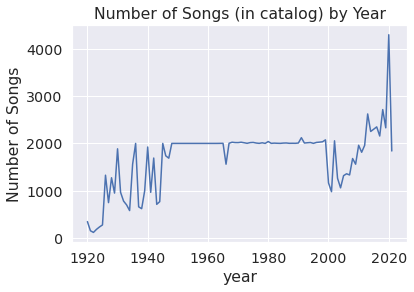

In [ ]:
#groups data by year and establishes a count
byyear = df.groupby(['year'])
yearsongs = byyear['energy'].count()
yearsongs.plot( 
         title='Number of Songs (in catalog) by Year')
plt.ylabel("Number of Songs")

#Danceability over time

the average danceability of entries in the 
spotify catalog sorted by year.

dancebility is a novel numerical model ranking entries by song data that has been linked to dance. this is interesting as it creates a numerical relationship for something intangible. 

in: dataframe

out: plot of average danceability sorted by year,
and short list of artists with the highest values

conclusion: the trend of danceable of music appears to peak in the early 20th and 21st centuries with a minimum in the early/mid 20th century

,artists,danceability
13734,['Tone-Loc'],0.988
54525,"['Spooner Street', 'Rio Dela Duna', 'Leonardo ...",0.987
141441,"['Pitbull', 'Trina', 'Young Bo']",0.986


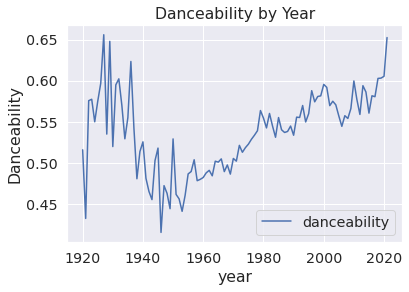

In [ ]:
#shows average danceabiilty by year, and the artists with the highest danceability
b = byyear['danceability'].agg('mean').to_frame()
b.plot(title='Danceability by Year')
plt.ylabel("Danceability")
df[['artists','danceability']].sort_values('danceability', ascending=False).head(3)

#Visualization
plots of metrics sorted broadly by genre

in: dataframe cleaned as described in the above section "sorted genre table"

out: plots showing avg duration by genre, avg loudness by genre, etc

In [ ]:
#creates new table by parent genre using average in each parameter
#c.execute('DROP TABLE df2')
df1.to_sql('df2', con=conn)
a = pd.read_sql_query(
    "SELECT `parent genre`, count(`parent genre`) as count, avg(liveness) as liveness\
    ,avg(acousticness) as acousticness, avg(energy) as energy, avg(instrumentalness) as intrumentalness\
     ,avg(duration_ms) as duration, avg(loudness) as loudness, avg(speechiness) as speechiness\
     ,avg(tempo) as tempo\
     FROM df2 group by `parent genre` having `parent genre` != 0", con = conn)
a

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:2615: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


,parent genre,count,liveness,acousticness,energy,intrumentalness,duration,loudness,speechiness,tempo
0,classical,1187,0.187118,0.886103,0.195927,0.496437,304455.805551,-20.237973,0.060031,103.264093
1,electro,1082,0.241075,0.059308,0.799457,0.523544,282175.073277,-8.088577,0.083670,129.157005
2,folk,1168,0.197570,0.510229,0.476635,0.102573,228203.783430,-11.221377,0.059292,118.849640
3,hip hop/rap,1228,0.205226,0.183593,0.665905,0.056682,240212.117896,-7.439726,0.186439,118.045582
4,house,565,0.174744,0.207932,0.662309,0.271009,306248.060696,-8.684637,0.087807,122.205977
5,jazz,1467,0.186191,0.566566,0.441872,0.289086,273913.696376,-12.508307,0.069369,113.968969
6,latin,644,0.193497,0.360274,0.621643,0.097621,257366.471062,-8.664864,0.083961,120.279247
7,pop,4563,0.194185,0.288907,0.631700,0.084238,232444.302327,-8.241328,0.077097,121.362149
8,rock,2292,0.205392,0.216073,0.677088,0.144938,238597.934664,-8.706683,0.073455,124.226156


[Text(0.5, 0, '')]

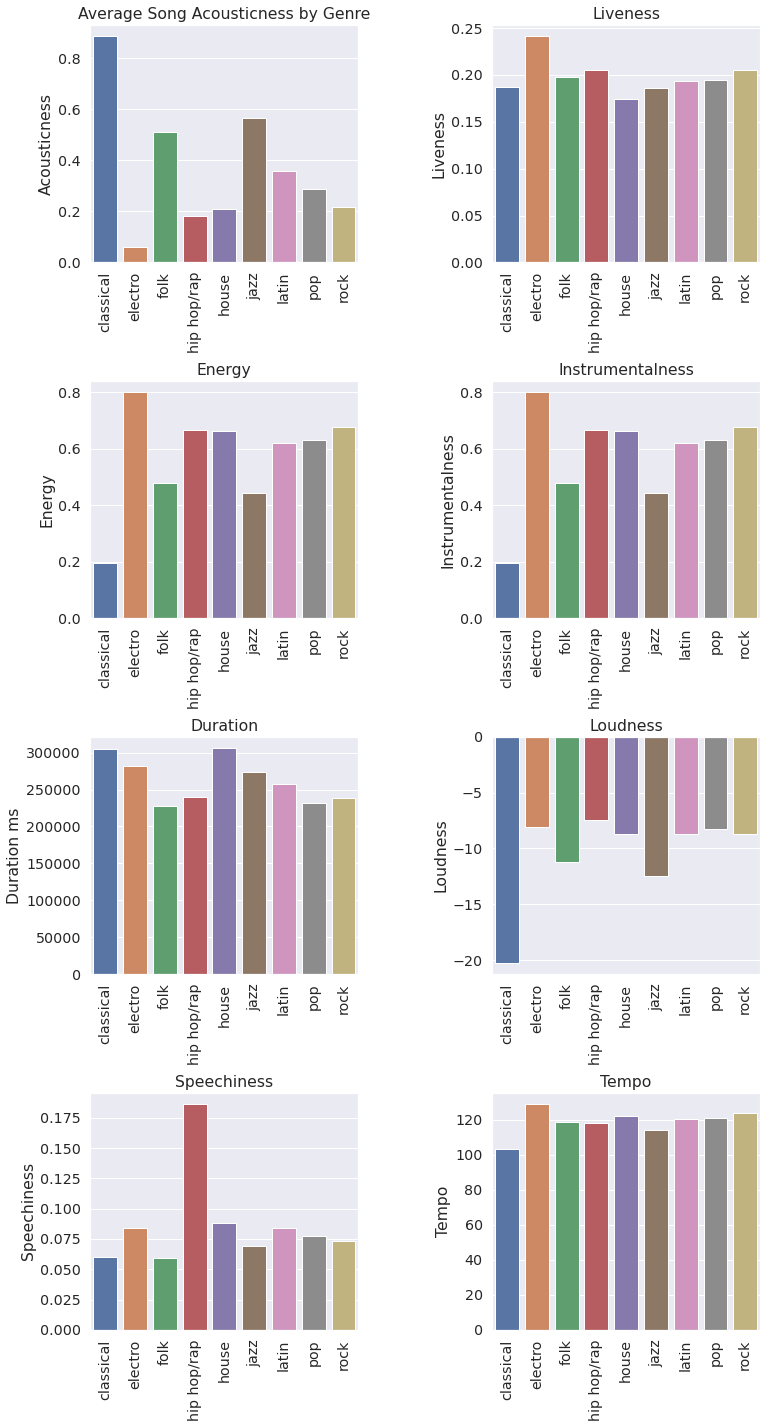

In [ ]:
#plot code
sns.set(font_scale = 1.3)
f, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(
    4, 2, figsize=(12, 24))
f.subplots_adjust(wspace=.5)
f.subplots_adjust(hspace=.5)
sns.barplot(x='parent genre', y='acousticness', data=a, ax=ax1).set_title("Average Song Acousticness by Genre")
sns.barplot(x='parent genre', y='liveness', data=a, ax=ax2).set_title("Liveness")
sns.barplot(x='parent genre', y='energy', data=a, ax=ax3).set_title("Energy")
sns.barplot(x='parent genre', y='energy', data=a, ax=ax4).set_title("Instrumentalness")
sns.barplot(x='parent genre', y='duration', data=a, ax=ax5).set_title("Duration")
sns.barplot(x='parent genre', y='loudness', data=a, ax=ax6).set_title("Loudness")
sns.barplot(x='parent genre', y='speechiness', data=a, ax=ax7).set_title("Speechiness")
sns.barplot(x='parent genre', y='tempo', data=a, ax=ax8).set_title("Tempo")
ax1.tick_params(axis='x', labelrotation=90)
ax2.tick_params(axis='x', labelrotation=90)
ax3.tick_params(axis='x', labelrotation=90)
ax1.set_ylabel('Acousticness')
ax2.set_ylabel('Liveness')
ax3.set_ylabel('Energy')
ax4.tick_params(axis='x', labelrotation=90)
ax4.set_ylabel('Instrumentalness')
ax1.set(xlabel=None)
ax2.set(xlabel=None)
ax3.set(xlabel=None)
ax4.set(xlabel=None)
ax5.tick_params(axis='x', labelrotation=90)
ax5.set_ylabel('Duration ms')
ax5.set(xlabel=None)
ax6.tick_params(axis='x', labelrotation=90)
ax6.set_ylabel('Loudness')
ax6.set(xlabel=None)
ax7.tick_params(axis='x', labelrotation=90)
ax7.set_ylabel('Speechiness')
ax7.set(xlabel=None)
ax8.tick_params(axis='x', labelrotation=90)
ax8.set_ylabel('Tempo')
ax8.set(xlabel=None)


#Graphs
![picture](https://drive.google.com/uc?export=view&id=1eewdR9ppVylYS6DoC8zySTPiSm4X-Ud2)

#Other Insights:
the following shows an example where I isolate a relationship between song key and soft characteristics such as popularity, danceability, and valence (mood), controlling for the other variables

in: data for a single genre


out: data sorted to exclude outliers in all metrics besides the ones being inspected:

    (key) = independent variable
    (popularity, danceability, valence) = dependent variables

#Control Data Rock
incl. markdown for model attributing "controlled data"

In [ ]:
df3 = df1
df3 = df3.loc[(df3['parent genre'] == 'rock')]
a = (df3['duration_ms']).median()               #assigns median values for each variable to be controlled
r = ((df3['acousticness'])).median()
d = ((df3['instrumentalness'])).median()
e = ((df3['liveness'])).median()
f = df3['loudness'].median()
g = ((df3['speechiness'])).median()
h = df3['tempo'].median()
print(f'median song duration = {a}')
print(f'median acousticness = {r}')
print(f'median instrumentalness = {d}')
print(f'median liveness = {e}')
print(f'median loudness = {f}')
print(f'median speechiness = {g}')
print(f'median tempo = {h}')
controlRock = df3.loc[(df3['duration_ms']).between(a/2, 3*a/2)   #excludes results that are not close to the median
            &((df3['loudness']).between(3*f/2, f/2))  
            &(((df3['speechiness'])).between(g/2, 3*g/2)) 
            &((df3['tempo']).between(h/2, 3*h/2))  
            &((df3['liveness']).between(0, 3*e/2)) #adjusted 
            &((df3['acousticness']).between(0, 3*r/2)) #adjusted 
            &((df3['instrumentalness']).between(0, 3*d/2)) #adjusted 
            &(df3['parent genre'] != 0) 
            ]
print(len(controlRock))

median song duration = 228002.3333333333
median acousticness = 0.10984691666666666
median instrumentalness = 0.006850619166666667
median liveness = 0.17289749999999993
median loudness = -8.321181818181817
median speechiness = 0.0514
median tempo = 123.99008333333333
268


#Control Data (classical)

In [ ]:
df3 = df1
df3 = df3.loc[(df3['parent genre'] == 'classical')]
a = (df3['duration_ms']).median()
r = ((df3['acousticness'])).median()
d = ((df3['instrumentalness'])).median()
e = ((df3['liveness'])).median()
f = df3['loudness'].median()
g = ((df3['speechiness'])).median()
h = df3['tempo'].median()
k = df3['energy'].median()
print(f'median song duration = {a}')
print(f'median acousticness = {r}')
print(f'median instrumentalness = {d}')
print(f'median liveness = {e}')
print(f'median loudness = {f}')
print(f'median speechiness = {g}')
print(f'median tempo = {h}')
print(f'median energy = {k}')
controlClass = df3.loc[(df3['duration_ms']).between(a/2, 3*a/2)  
            &((df3['loudness']).between(-100, f/2))  
            &(((df3['speechiness'])).between(g/2, 3*g/2)) 
            &((df3['tempo']).between(h/2, 3*h/2))  
            &((df3['energy']).between(0, 3*k/2))   
            &((df3['liveness']).between(0, 3*e/2)) 
            &((df3['acousticness']).between(r/2, 1)) 
            &((df3['instrumentalness']).between(0, 3*d/2)) 
            &(df3['parent genre'] != 0) 
            ]
print(len(controlClass))
controlClass

median song duration = 265202.4117647059
median acousticness = 0.964
median instrumentalness = 0.5730000000000002
median liveness = 0.14533888888888885
median loudness = -19.772
median speechiness = 0.0461
median tempo = 101.39644444444444
median energy = 0.14924444444444446
279


,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres,parent genre
329,Aaron Copland,0.954341,0.348621,253276.844961,0.158770,0.452408,0.155046,-19.185581,0.063864,107.339171,0.221378,7.775194,7,1,129,"['american modern classical', 'classical', 'ea...",classical
398,Academy of Ancient Music,0.890909,0.333000,253979.363636,0.198036,0.090386,0.169127,-19.692364,0.043245,107.849545,0.306955,46.909091,1,1,11,"['baroque ensemble', 'british orchestra', 'cho...",classical
399,Academy of St. Martin in the Fields,0.950685,0.294182,302988.684783,0.118256,0.647304,0.162854,-22.313000,0.042945,100.091250,0.221311,32.423913,7,1,92,"['british orchestra', 'chamber orchestra', 'cl...",classical
632,Akademie für Alte Musik Berlin,0.935000,0.193000,183333.000000,0.095000,0.277000,0.109000,-23.482000,0.046800,107.440000,0.041900,50.000000,4,1,1,"['barockinterpreten', 'baroque ensemble', 'cho...",classical
741,Alban Berg,0.964167,0.315667,376264.416667,0.150333,0.161232,0.138950,-19.612250,0.065342,103.849167,0.135975,1.833333,10,1,12,"['classical', 'classical performance', 'streic...",classical
753,Albert Lortzing,0.943000,0.369333,292154.333333,0.112333,0.696333,0.120167,-16.261000,0.042800,121.639667,0.299667,0.000000,7,1,3,"['classical era', 'german opera', 'german roma...",classical
790,Alda Noni,0.987000,0.446500,209876.000000,0.072300,0.321500,0.085200,-17.456000,0.060550,112.016500,0.153900,0.000000,3,1,2,"['classical soprano', 'italian soprano', 'vint...",classical
854,Alessio Bax,0.987000,0.296000,220773.000000,0.043500,0.857000,0.078600,-29.730000,0.041100,72.282000,0.030200,62.000000,0,1,2,"['classical piano', 'italian classical piano']",classical
929,Alexander Borodin,0.950176,0.293053,237594.529412,0.183129,0.686659,0.215982,-19.644176,0.041365,99.993706,0.188906,22.000000,9,1,17,"['classical', 'late romantic era', 'russian ro...",classical
936,Alexander Gretchaninov,0.979000,0.237000,228907.000000,0.073500,0.001380,0.093300,-22.040000,0.037800,99.614000,0.167000,0.500000,7,1,2,"['russian modern classical', 'russian romantic...",classical


#Control Electro

In [ ]:
df3 = df1
df3 = df3.loc[(df3['parent genre'] == 'electro')]
a = (df3['duration_ms']).median()
r = ((df3['acousticness'])).median()
d = ((df3['instrumentalness'])).median()
e = ((df3['liveness'])).median()
f = df3['loudness'].median()
g = ((df3['speechiness'])).median()
h = df3['tempo'].median()
k = df3['energy'].median()
print(f'median song duration = {a}')
print(f'median acousticness = {r}')
print(f'median instrumentalness = {d}')
print(f'median liveness = {e}')
print(f'median loudness = {f}')
print(f'median speechiness = {g}')
print(f'median tempo = {h}')
print(f'median energy = {k}')
controlElectro = df3.loc[(df3['duration_ms']).between(a/2, 10000000000)  
            &((df3['loudness']).between(-100, f/2))  
            &(((df3['speechiness'])).between(g/2, 3*g/2)) 
            &((df3['tempo']).between(h/2, 3*h/2))  
            &((df3['energy']).between(0, 1))   
            &((df3['liveness']).between(0, 1)) 
            &((df3['acousticness']).between(0, 3*r/2)) 
            &((df3['instrumentalness']).between(0, 1)) 
            &(df3['parent genre'] != 0) 
            ]
print(controlElectro)
print(len(controlElectro))

median song duration = 259079.8333333333
median acousticness = 0.00485625
median instrumentalness = 0.59445
median liveness = 0.20092083333333333
median loudness = -7.525250000000001
median speechiness = 0.06221666666666666
median tempo = 129.525
median energy = 0.8485416666666666
                                 artists  ...  parent genre
50                                 19 Hz  ...       electro
138                      3Phazegenerator  ...       electro
373                        Abnormal Boyz  ...       electro
389                      Abstract Vision  ...       electro
410                          Ace Ventura  ...       electro
429                             Ad Brown  ...       electro
449                               Adam K  ...       electro
456                          Adam Nickey  ...       electro
525                           Aero Chord  ...       electro
526                          Aerodroemme  ...       electro
609                               Aimoon  ...       electr

#Controlled Test Results

plots showing key vs. various characteristics where all other variables are fixed at values close to the median

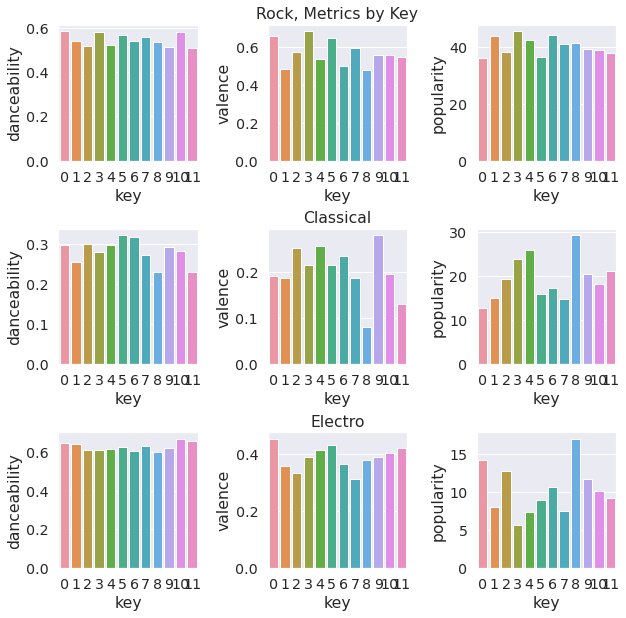

In [ ]:
#graphs for the controlled data
sns.set(font_scale = 1.3)
f, ((ax1, ax2, ax3),(ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(
    3, 3, figsize=(10, 10))
f.subplots_adjust(hspace=.5)
f.subplots_adjust(wspace=.5)
sns.barplot(x='key', y='danceability', data=controlRock, ax=ax1, ci=None)
sns.barplot(x='key', y='valence', data=controlRock, ax=ax2, ci=None).set_title("Rock, Metrics by Key")
sns.barplot(x='key', y='popularity', data=controlRock, ax=ax3, ci=None)

sns.barplot(x='key', y='danceability', data=controlClass, ax=ax4, ci=None)
sns.barplot(x='key', y='valence', data=controlClass, ax=ax5, ci=None).set_title("Classical")
sns.barplot(x='key', y='popularity', data=controlClass, ax=ax6, ci=None)

sns.barplot(x='key', y='danceability', data=controlElectro, ax=ax7, ci=None)
sns.barplot(x='key', y='valence', data=controlElectro, ax=ax8, ci=None).set_title("Electro")
sns.barplot(x='key', y='popularity', data=controlElectro, ax=ax9, ci=None)

#result 
the dataset is shows promise for interesting results, but is insufficient to prove or disprove the relation between key and the targeted metrics. 

genre data is present for a subset of ~30k songs of 180k in the database. once sorted genre categories have hundreds of entries. distributed over 12 musical keys, the weak relationship being tested for is confounded by the small data set. 

future goal: an increase in data set size

more useful genre designations applied to songs during initial sorting

#Conclusions
fascinating correlations can be shown for seemingly intangible characteristics. as technology advances this is a goal for further inspection in all industries and applications.

a model of how to isolate variables and uncover new/secondary relationships is presented, along with challenges

future goal identified as need for coordination between data pipeline and analysis

#Feedback 

***Good work with using both SQL and python in your analysis. Very unique idea. The codes that you used themselves were good and I enjoyed that you had very colourful plots. For your next steps, I suggest fixing up some of the grammatical and spelling mistakes in your markdown cells and try to use the markdown cells to explain what you are doing as if you were telling the viewer a story so that it is easier for them to follow along with.***